## Assignment 1: Introduction to Data Science and AI - By Group 4

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>?</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>?</font> |

#### **Question (a)**
Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make
when selecting data to be plotted, and in combining data.

##### Step 0: Import Library

In [890]:
import ipywidgets as widgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.rcParams['figure.dpi'] = 300
pd.set_option('display.max_rows', 100)

##### Step 1: Select and Load datasets

In [891]:
# load related datasets, in this assignment, we choose 3 datasets
gdp_per_captita = pd.read_csv('gdp-per-capita-maddison-2020.csv')
life_expectancy = pd.read_csv('life-expectancy.csv')
gdp = pd.read_csv('gross-domestic-product.csv')

In [892]:
gdp[(gdp['Year']==2018) & (gdp['Code'].notnull())]

,Entity,Code,Year,GDP (constant 2015 US$)
16,Afghanistan,AFG,2018,20323487744
57,Albania,ALB,2018,12702457856
118,Algeria,DZA,2018,175426093056
137,American Samoa,ASM,2018,631900736
188,Andorra,AND,2018,2949506304
...,...,...,...,...
10242,Vietnam,VNM,2018,234736467968
10303,World,OWID_WRL,2018,82472154955776
10334,Yemen,YEM,2018,36789669888
10393,Zambia,ZMB,2018,23747586048


##### Step 2: Merge datasets

In [893]:
# merge three datasets into one dataset
df = pd.merge(gdp_per_captita,life_expectancy)
# df = pd.merge(df1,gdp)
df

,Entity,Code,Year,GDP per capita,417485-annotations,Life expectancy at birth (historical)
0,Afghanistan,AFG,1950,1156.0000,NaN,27.7
1,Afghanistan,AFG,1951,1170.0000,NaN,28.0
2,Afghanistan,AFG,1952,1189.0000,NaN,28.4
3,Afghanistan,AFG,1953,1240.0000,NaN,28.9
4,Afghanistan,AFG,1954,1245.0000,NaN,29.2
...,...,...,...,...,...,...
12440,Zimbabwe,ZWE,2014,1594.0000,NaN,58.8
12441,Zimbabwe,ZWE,2015,1560.0000,NaN,59.6
12442,Zimbabwe,ZWE,2016,1534.0000,NaN,60.3
12443,Zimbabwe,ZWE,2017,1582.3662,NaN,60.7


##### Step 3: Clean data

Clear data of gdp_per_captita

In [894]:
# print(df['Code'].unique())

# drop unnecessary column '417485-annotations' 
df = df.drop('417485-annotations', axis=1)

# drop Entities which are not a country
df = df[df['Code']!='OWID_WRL']

# check if there is missing values in gdp_per_captita
print(df.isnull().sum())

# drop 'nan' values
df = df[df['Code'].notnull()]

print(df['Code'].unique())
print(df.isnull().sum())
df


Entity                                   0
Code                                     0
Year                                     0
GDP per capita                           0
Life expectancy at birth (historical)    0
dtype: int64
['AFG' 'ALB' 'DZA' 'AGO' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BHR' 'BGD' 'BRB'
 'BLR' 'BEL' 'BEN' 'BOL' 'BIH' 'BWA' 'BRA' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR'
 'CAN' 'CPV' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'CIV' 'HRV'
 'CUB' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ'
 'EST' 'SWZ' 'ETH' 'FIN' 'FRA' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GTM'
 'GIN' 'GNB' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL'
 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN'
 'LSO' 'LBR' 'LBY' 'LTU' 'LUX' 'MDG' 'MWI' 'MYS' 'MLI' 'MLT' 'MRT' 'MUS'
 'MEX' 'MDA' 'MNG' 'MNE' 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NZL' 'NIC'
 'NER' 'NGA' 'PRK' 'MKD' 'NOR' 'OMN' 'PAK' 'PSE' 'PAN' 'PRY' 'PER' 'PHL'
 'POL' 'PRT' 'PRI' 'QAT' 'ROU' 'RUS' 'RWA'

,Entity,Code,Year,GDP per capita,Life expectancy at birth (historical)
0,Afghanistan,AFG,1950,1156.0000,27.7
1,Afghanistan,AFG,1951,1170.0000,28.0
2,Afghanistan,AFG,1952,1189.0000,28.4
3,Afghanistan,AFG,1953,1240.0000,28.9
4,Afghanistan,AFG,1954,1245.0000,29.2
...,...,...,...,...,...
12440,Zimbabwe,ZWE,2014,1594.0000,58.8
12441,Zimbabwe,ZWE,2015,1560.0000,59.6
12442,Zimbabwe,ZWE,2016,1534.0000,60.3
12443,Zimbabwe,ZWE,2017,1582.3662,60.7


In [895]:
df.describe()

,Year,GDP per capita,Life expectancy at birth (historical)
count,12431.000000,12431.000000,12431.000000
mean,1973.152844,9207.957746,60.299574
std,41.703765,11926.772482,13.204654
min,1543.000000,377.580100,12.000000
25%,1960.000000,1970.732150,49.500000
50%,1981.000000,4812.000000,62.300000
75%,2000.000000,11171.104500,71.300000
max,2018.000000,156299.000000,85.200000


##### Step4: Plot 

Select 4 years, 2018,1990,1950,1900

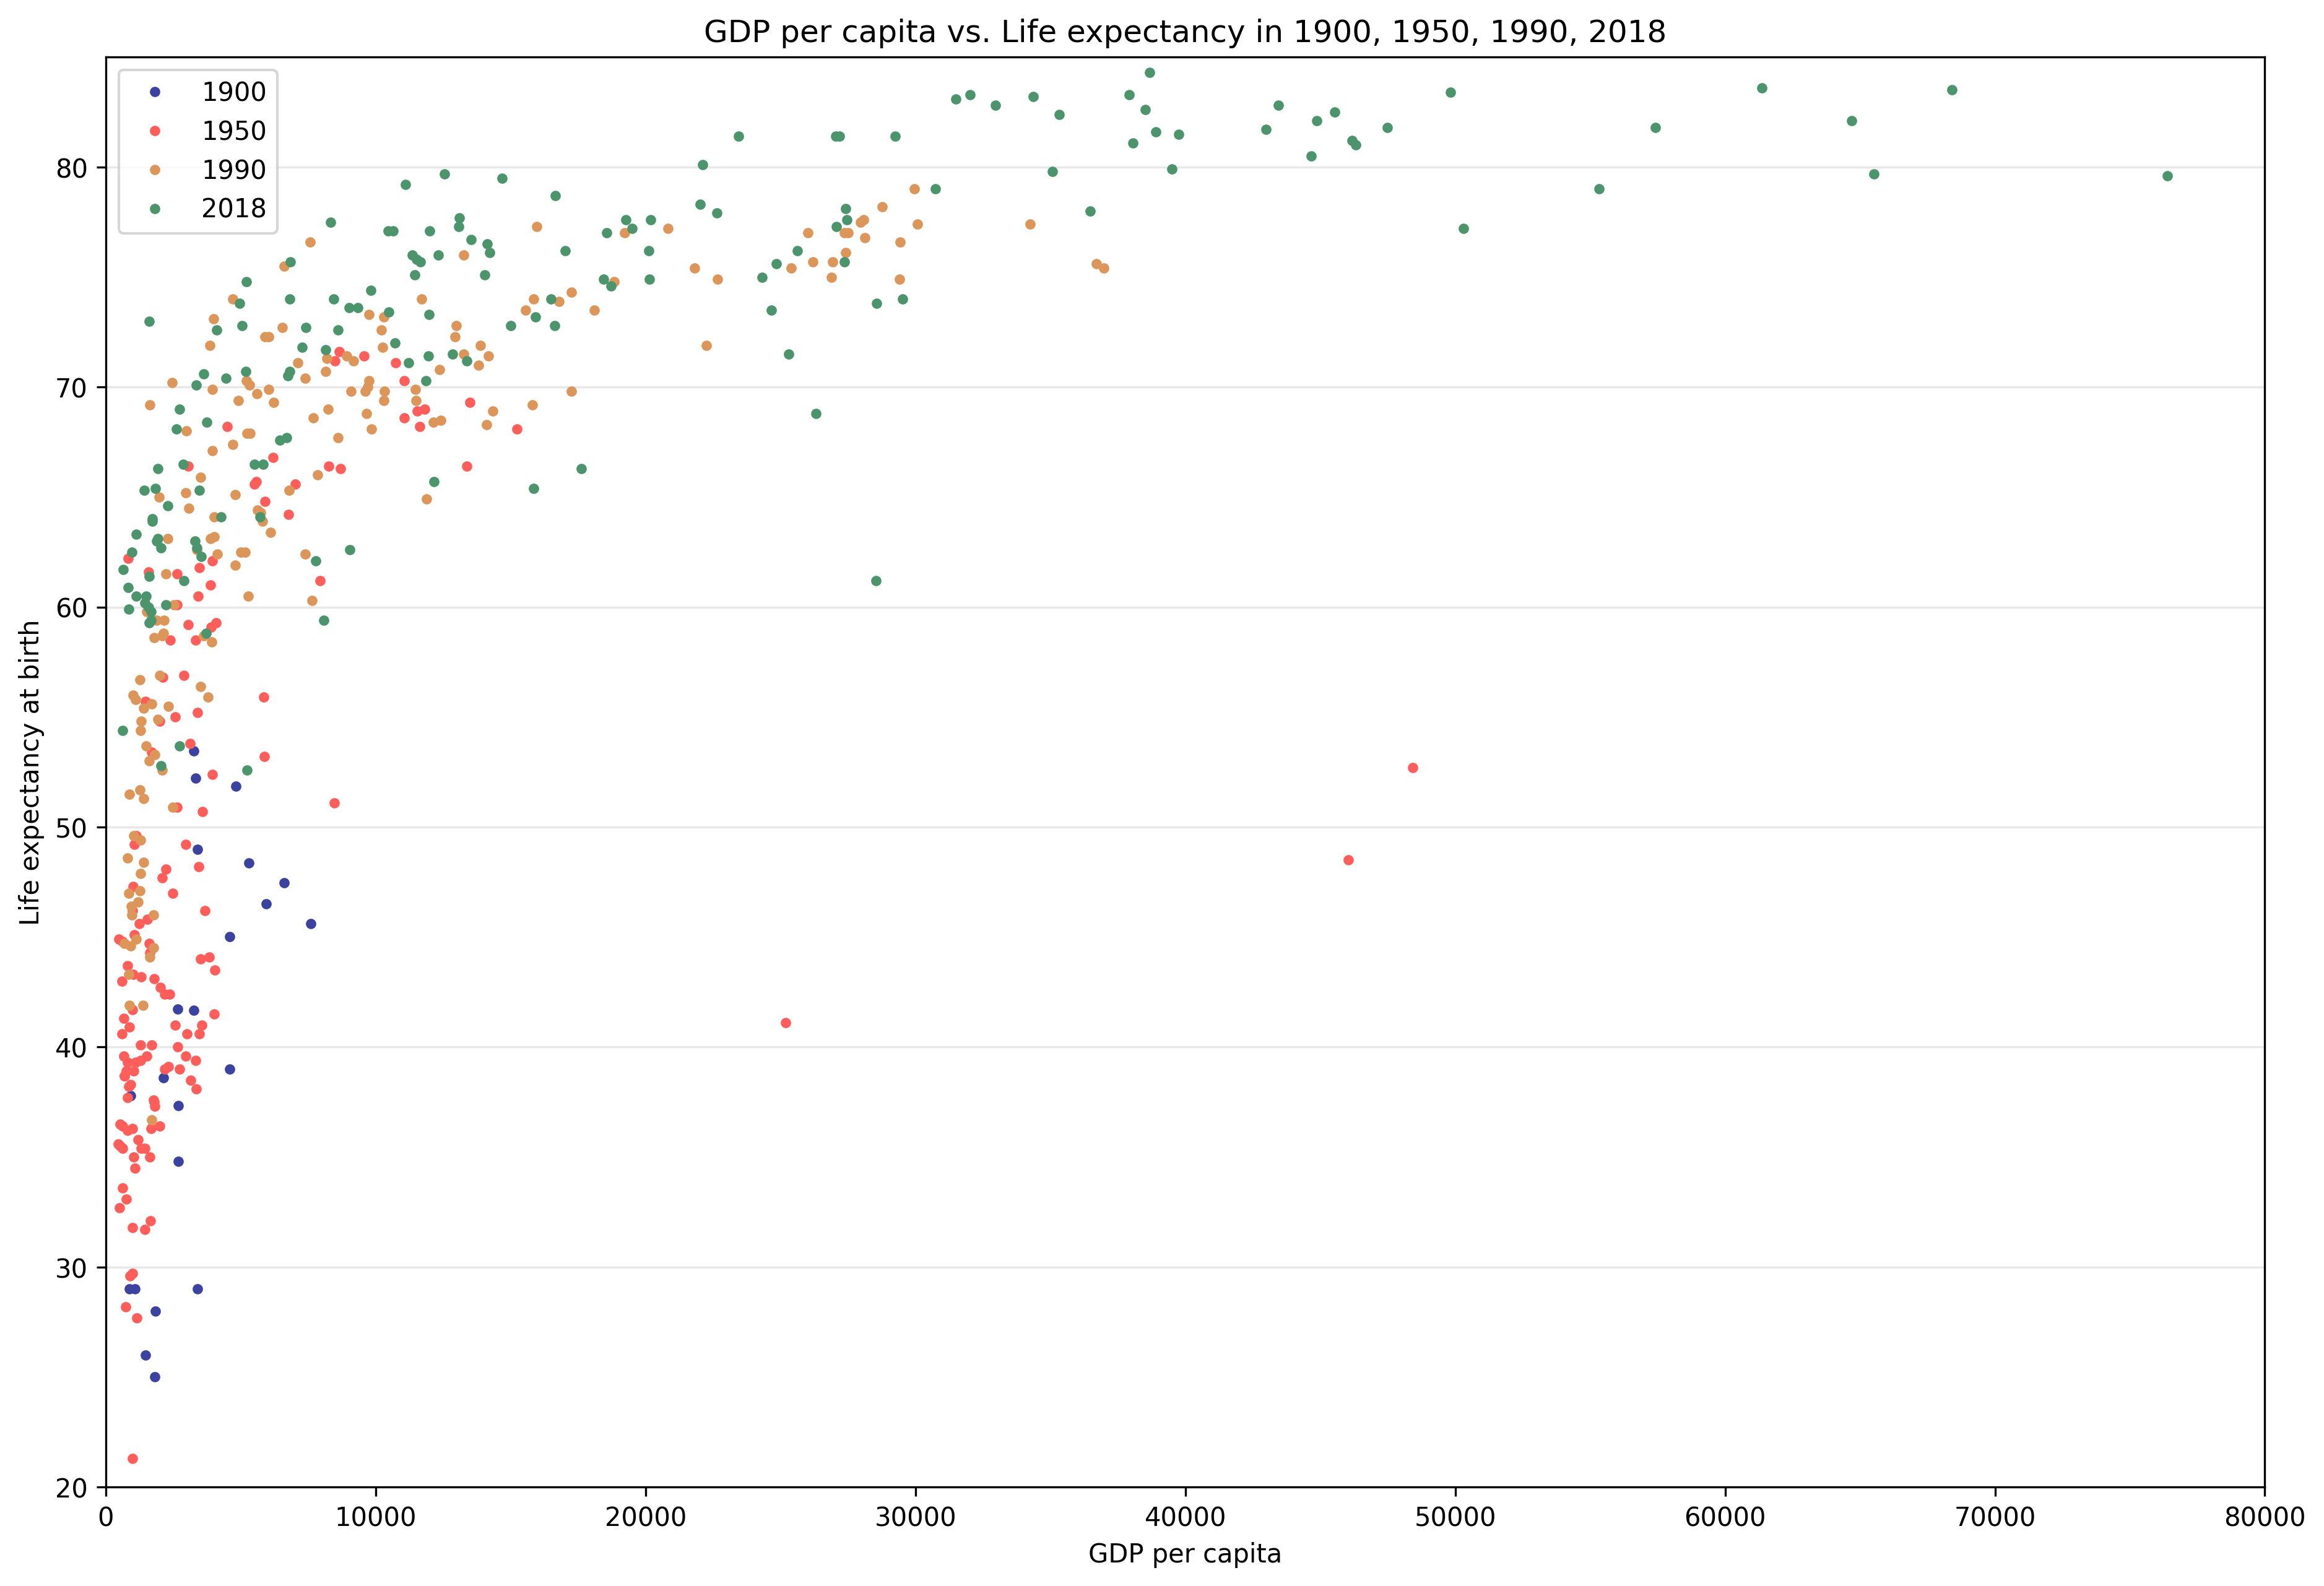

In [896]:
# df = df[(df['Year']==1800) | (df['Year']==1950) | (df['Year']==1990) | (df['Year']==2018)]

df_1900 = df[(df['Year']==1900)]
df_1950 = df[(df['Year']==1950)]
df_1990 = df[(df['Year']==1990)]
df_2018 = df[(df['Year']==2018)]

# sns.scatterplot(data=df, x="GDP per capita", y="Life expectancy at birth (historical)", hue="Year",style="Year")
fig = plt.figure(figsize=[15,10])
plt.plot(df_1900['GDP per capita'], df_1900['Life expectancy at birth (historical)'], '.', color='#3B429F');
plt.plot(df_1950['GDP per capita'], df_1950['Life expectancy at birth (historical)'], '.', color='#FF5E5B');
plt.plot(df_1990['GDP per capita'], df_1990['Life expectancy at birth (historical)'], '.', color='#DC965A');
plt.plot(df_2018['GDP per capita'], df_2018['Life expectancy at birth (historical)'], '.', color='#4C956C');

plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy at birth')
plt.title('GDP per capita vs. Life expectancy in 1900, 1950, 1990, 2018')
plt.grid(axis = 'y', zorder=0, alpha=0.3)
plt.ylim(20, 85);
plt.xlim(0, 80000);
plt.legend(['1900','1950','1990','2018'])
plt.show()

#### **Question (b)**
Which countries have a life expectancy higher than one standard deviation above the mean?

In [897]:
df_1900.describe()

,Year,GDP per capita,Life expectancy at birth (historical)
count,22.0,22.000000,22.000000
mean,1900.0,3372.683127,39.841364
std,0.0,1858.912848,9.136453
min,1900.0,874.000000,25.000000
25%,1900.0,1915.312625,30.450000
50%,1900.0,3256.500000,40.335000
75%,1900.0,4583.750000,47.240000
max,1900.0,7594.000000,53.470000


In [898]:
df_1900[df_1900['Life expectancy at birth (historical)'] > (df_1900['Life expectancy at birth (historical)'].mean()+df_1900['Life expectancy at birth (historical)'].std())]

,Entity,Code,Year,GDP per capita,Life expectancy at birth (historical)
2960,Denmark,DNK,1900,4809.0,51.87
8309,Norway,NOR,1900,3249.0,53.47
10537,Sweden,SWE,1900,3320.0,52.21
11967,Uruguay,URY,1900,3387.0,49.00


In [899]:
df_1950[df_1950['Life expectancy at birth (historical)'] > (df_1950['Life expectancy at birth (historical)'].mean()+df_1950['Life expectancy at birth (historical)'].std())]

,Entity,Code,Year,GDP per capita,Life expectancy at birth (historical)
291,Argentina,ARG,1950,7949.000,61.2
432,Australia,AUS,1950,11815.000,69.0
511,Austria,AUT,1950,5907.000,64.8
966,Belgium,BEL,1950,8706.000,66.3
1396,Bulgaria,BGR,1950,2632.000,61.5
1775,Canada,CAN,1950,11622.000,68.2
2639,Cuba,CUB,1950,2638.000,60.1
3010,Denmark,DNK,1950,11067.000,70.3
3817,Finland,FIN,1950,6779.000,64.2
4016,France,FRA,1950,8266.000,66.4


In [900]:
df_1990[df_1990['Life expectancy at birth (historical)'] > (df_1990['Life expectancy at birth (historical)'].mean()+df_1990['Life expectancy at birth (historical)'].std())]

,Entity,Code,Year,GDP per capita,Life expectancy at birth (historical)
472,Australia,AUS,1990,27373.0,77.0
551,Austria,AUT,1990,26930.0,75.7
1006,Belgium,BEL,1990,27412.0,76.1
1815,Canada,CAN,1990,30082.0,77.4
2465,Costa Rica,CRI,1990,7567.0,76.6
3857,Finland,FIN,1990,26884.0,75.0
4056,France,FRA,1990,28129.0,76.8
4312,Germany,DEU,1990,25391.0,75.4
4465,Greece,GRC,1990,15964.0,77.3
4886,Hong Kong,HKG,1990,27960.0,77.5


In [901]:
df_2018[df_2018['Life expectancy at birth (historical)'] > (df_2018['Life expectancy at birth (historical)'].mean()+df_2018['Life expectancy at birth (historical)'].std())]


,Entity,Code,Year,GDP per capita,Life expectancy at birth (historical)
500,Australia,AUS,2018,49830.800,83.4
579,Austria,AUT,2018,42988.070,81.7
1034,Belgium,BEL,2018,39756.203,81.5
1843,Canada,CAN,2018,44868.742,82.1
2776,Cyprus,CYP,2018,27184.416,81.4
3078,Denmark,DNK,2018,46312.344,81.0
3885,Finland,FIN,2018,38896.700,81.6
4084,France,FRA,2018,38515.918,82.6
4340,Germany,DEU,2018,46177.617,81.2
4493,Greece,GRC,2018,23450.766,81.4


#### **Question (c)**
Which countries have high life expectancy but have low GDP? (note: GDP and not GDP per capita in question c and d) Motivate how you have chosen to define “high” and “low”.

In [902]:
# merge two relative 
df2 = pd.merge(life_expectancy,gdp)

# clean data
df2 = df2[(df2['Year']==2018) & (df2['Code'].notnull()) & (df2['Code']!='OWID_WRL')]

df2.describe()

,Year,Life expectancy at birth (historical),GDP (constant 2015 US$)
count,204.0,204.000000,2.040000e+02
mean,2018.0,72.683333,3.996796e+11
std,0.0,7.555295,1.742503e+12
min,2018.0,52.600000,3.901797e+07
25%,2018.0,66.500000,6.563651e+09
50%,2018.0,73.900000,2.735424e+10
75%,2018.0,78.150000,1.981720e+11
max,2018.0,86.500000,1.955198e+13


We define high life expectancy as 80 percentile of 

In [903]:
threshold = df2['Life expectancy at birth (historical)'].mean()+df2['Life expectancy at birth (historical)'].std() # 90th percentile
average_gdp = df2['GDP (constant 2015 US$)'].mean()-df2['GDP (constant 2015 US$)'].std()
print(threshold)
print(average_gdp)
df2

80.23862813066245
-1342823550935.7224


,Entity,Code,Year,Life expectancy at birth (historical),GDP (constant 2015 US$)
16,Afghanistan,AFG,2018,63.1,20323487744
57,Albania,ALB,2018,79.2,12702457856
118,Algeria,DZA,2018,76.1,175426093056
137,American Samoa,ASM,2018,72.5,631900736
188,Andorra,AND,2018,83.0,2949506304
...,...,...,...,...,...
9407,Vanuatu,VUT,2018,69.8,837054144
9444,Vietnam,VNM,2018,74.0,234736467968
9536,Yemen,YEM,2018,64.6,36789669888
9595,Zambia,ZMB,2018,62.3,23747586048


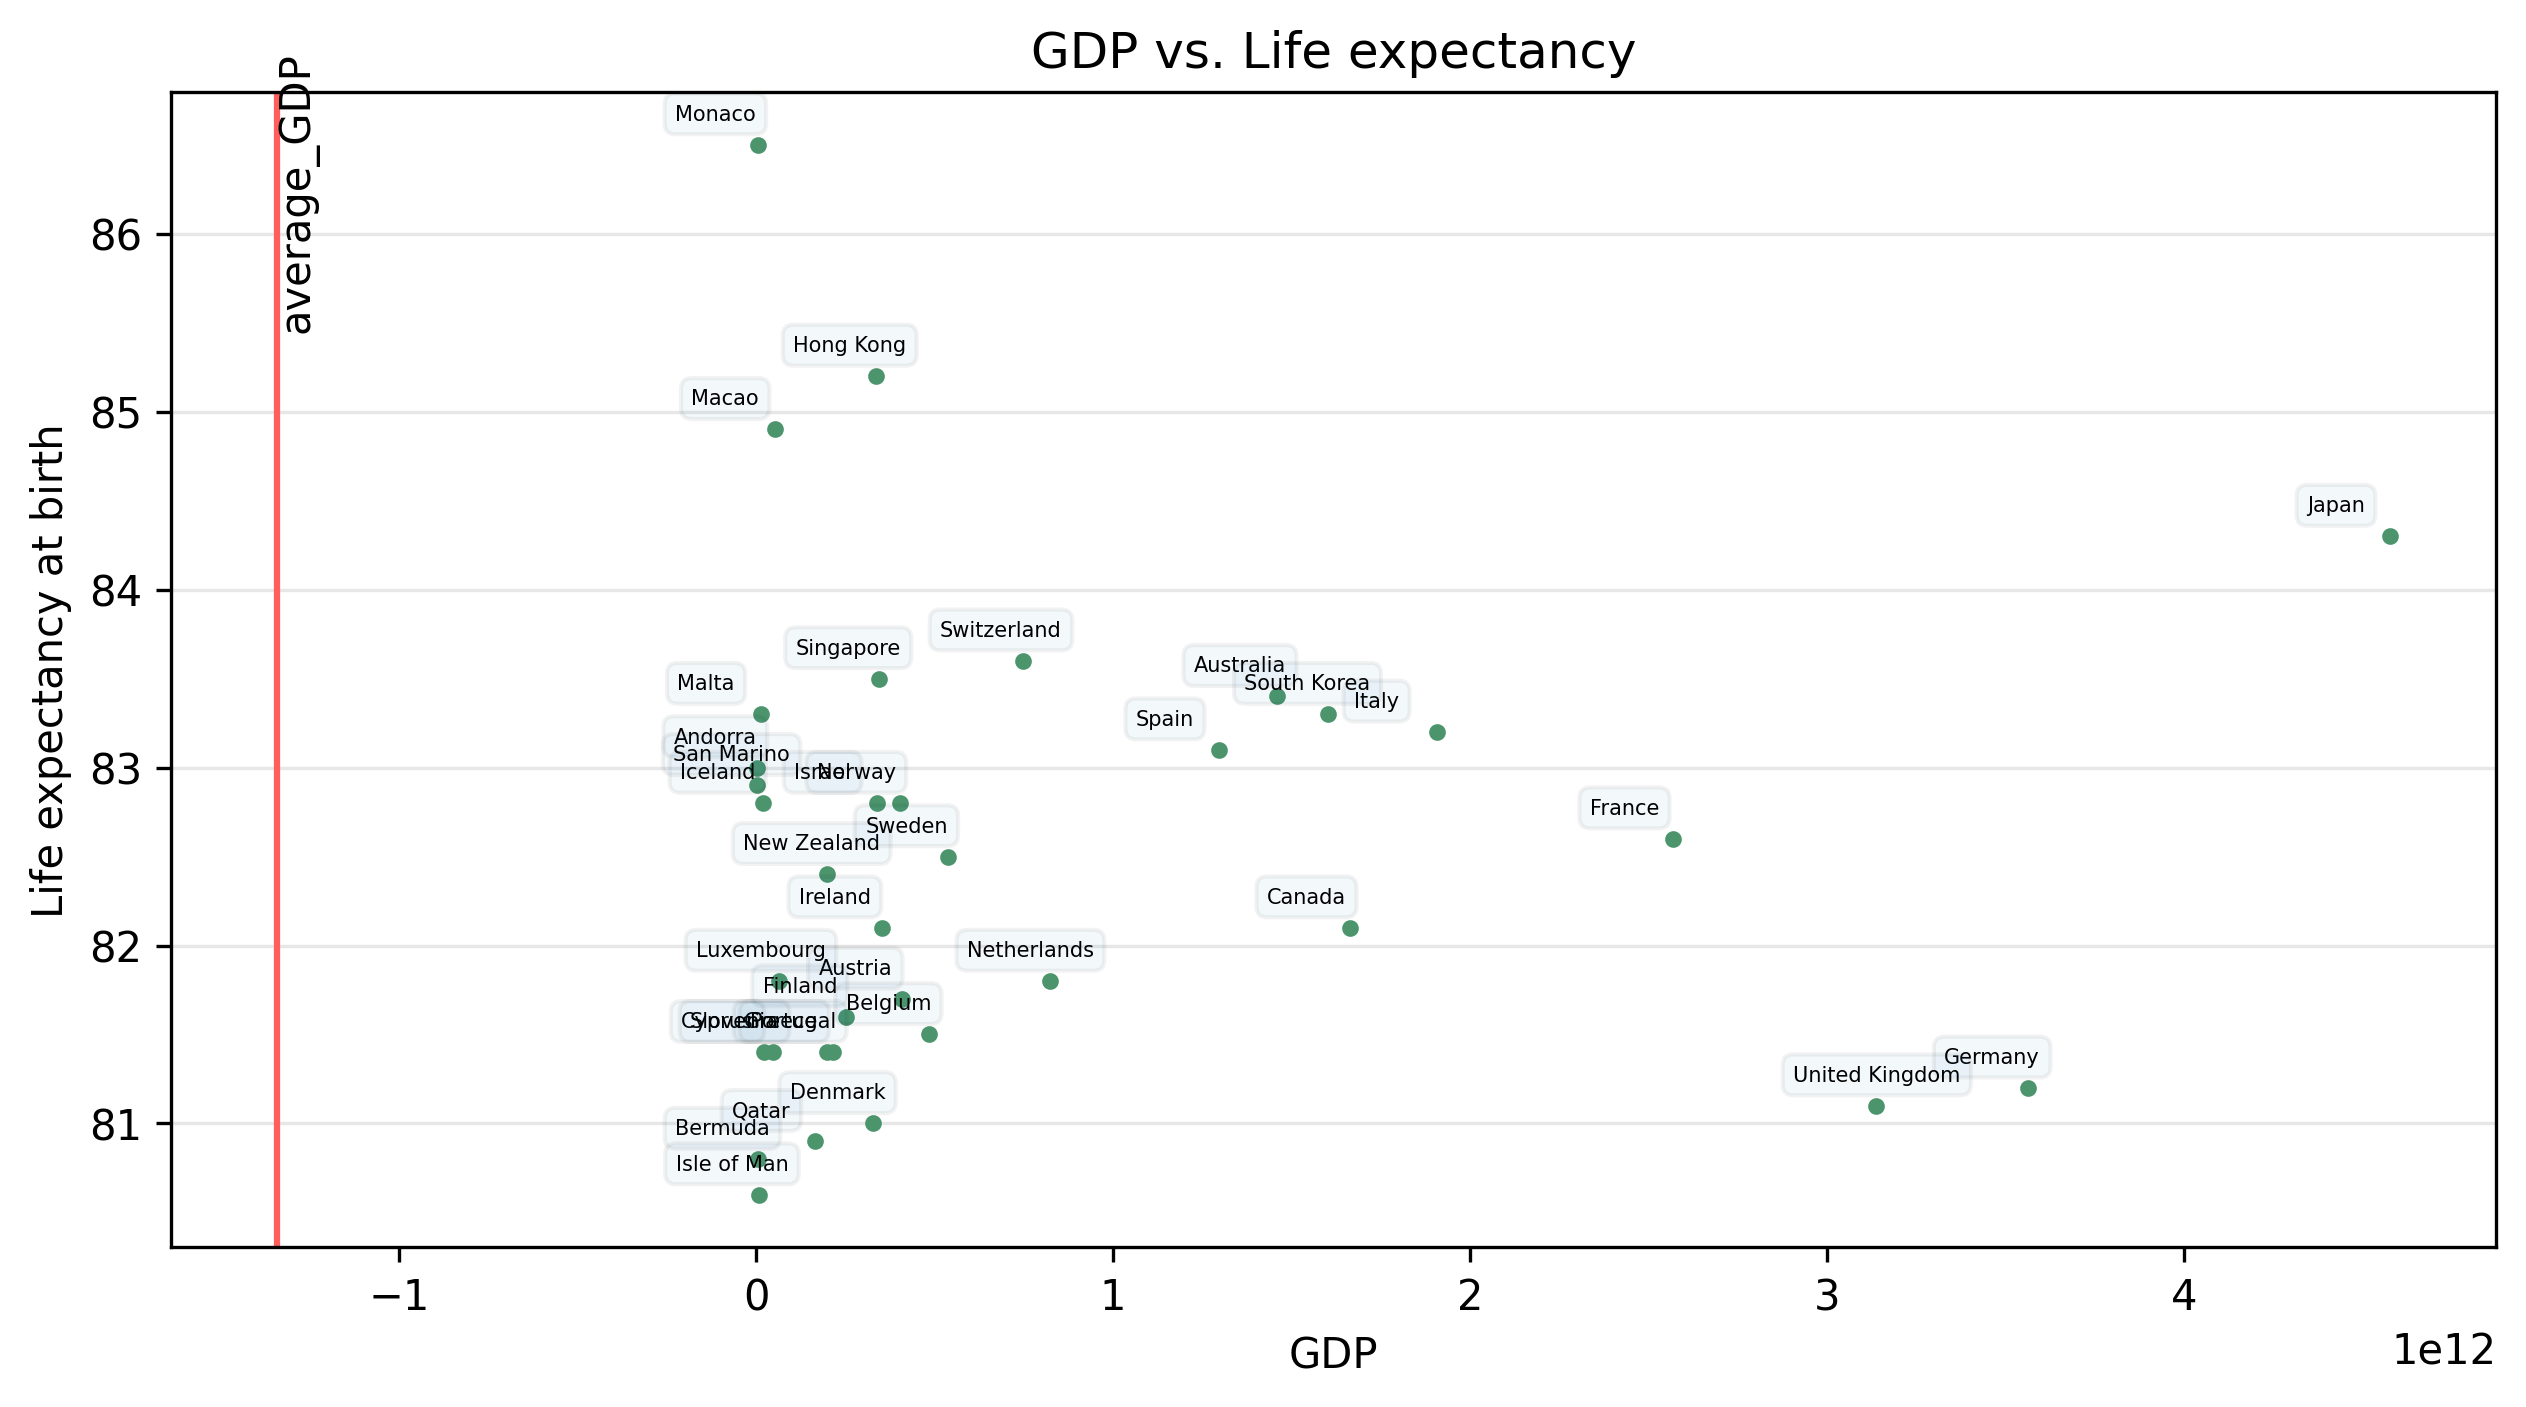

In [904]:
high_life_expectancy = df2[df2['Life expectancy at birth (historical)'] > threshold]


fig = plt.figure(figsize=[10,5])
plt.plot(high_life_expectancy['GDP (constant 2015 US$)'], high_life_expectancy['Life expectancy at birth (historical)'], '.', color='#4C956C');
# single line
plt.axvline(x = average_gdp, color = '#FF5E5B', label = 'average_gdp')
plt.text(average_gdp, 85.5, 'average_GDP',fontsize=10, rotation=90)

plt.xlabel('GDP')
plt.ylabel('Life expectancy at birth')
plt.title('GDP vs. Life expectancy')
plt.grid(axis = 'y', zorder=0, alpha=0.3)

for label, x, y in zip(high_life_expectancy['Entity'], high_life_expectancy['GDP (constant 2015 US$)'], high_life_expectancy['Life expectancy at birth (historical)']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 5),
        textcoords='offset points', ha='left', va='bottom',
        fontsize=5,
        bbox=dict(boxstyle='round,pad=0.5', alpha=0.05),
        )

plt.show()

**Answer:** As we can see from the figure above, Monaco, Malta, Andorra, San Marino and Iceland, these 5 countries although thay have high life expectancy (top 10%) but their GDP in 2018 is below average GDP, this may be related to the size and population of these countries are small.

#### **Question (d)**
Does every strong economy (normally indicated by GDP) have high life expectancy?

In [905]:
threshold_gdp = df2['GDP (constant 2015 US$)'].quantile(0.9) # 90th percentile
average_life_expectancy = df2['Life expectancy at birth (historical)'].quantile(0.5)
print(threshold_gdp)
print(average_life_expectancy)


571469335756.8007
73.9


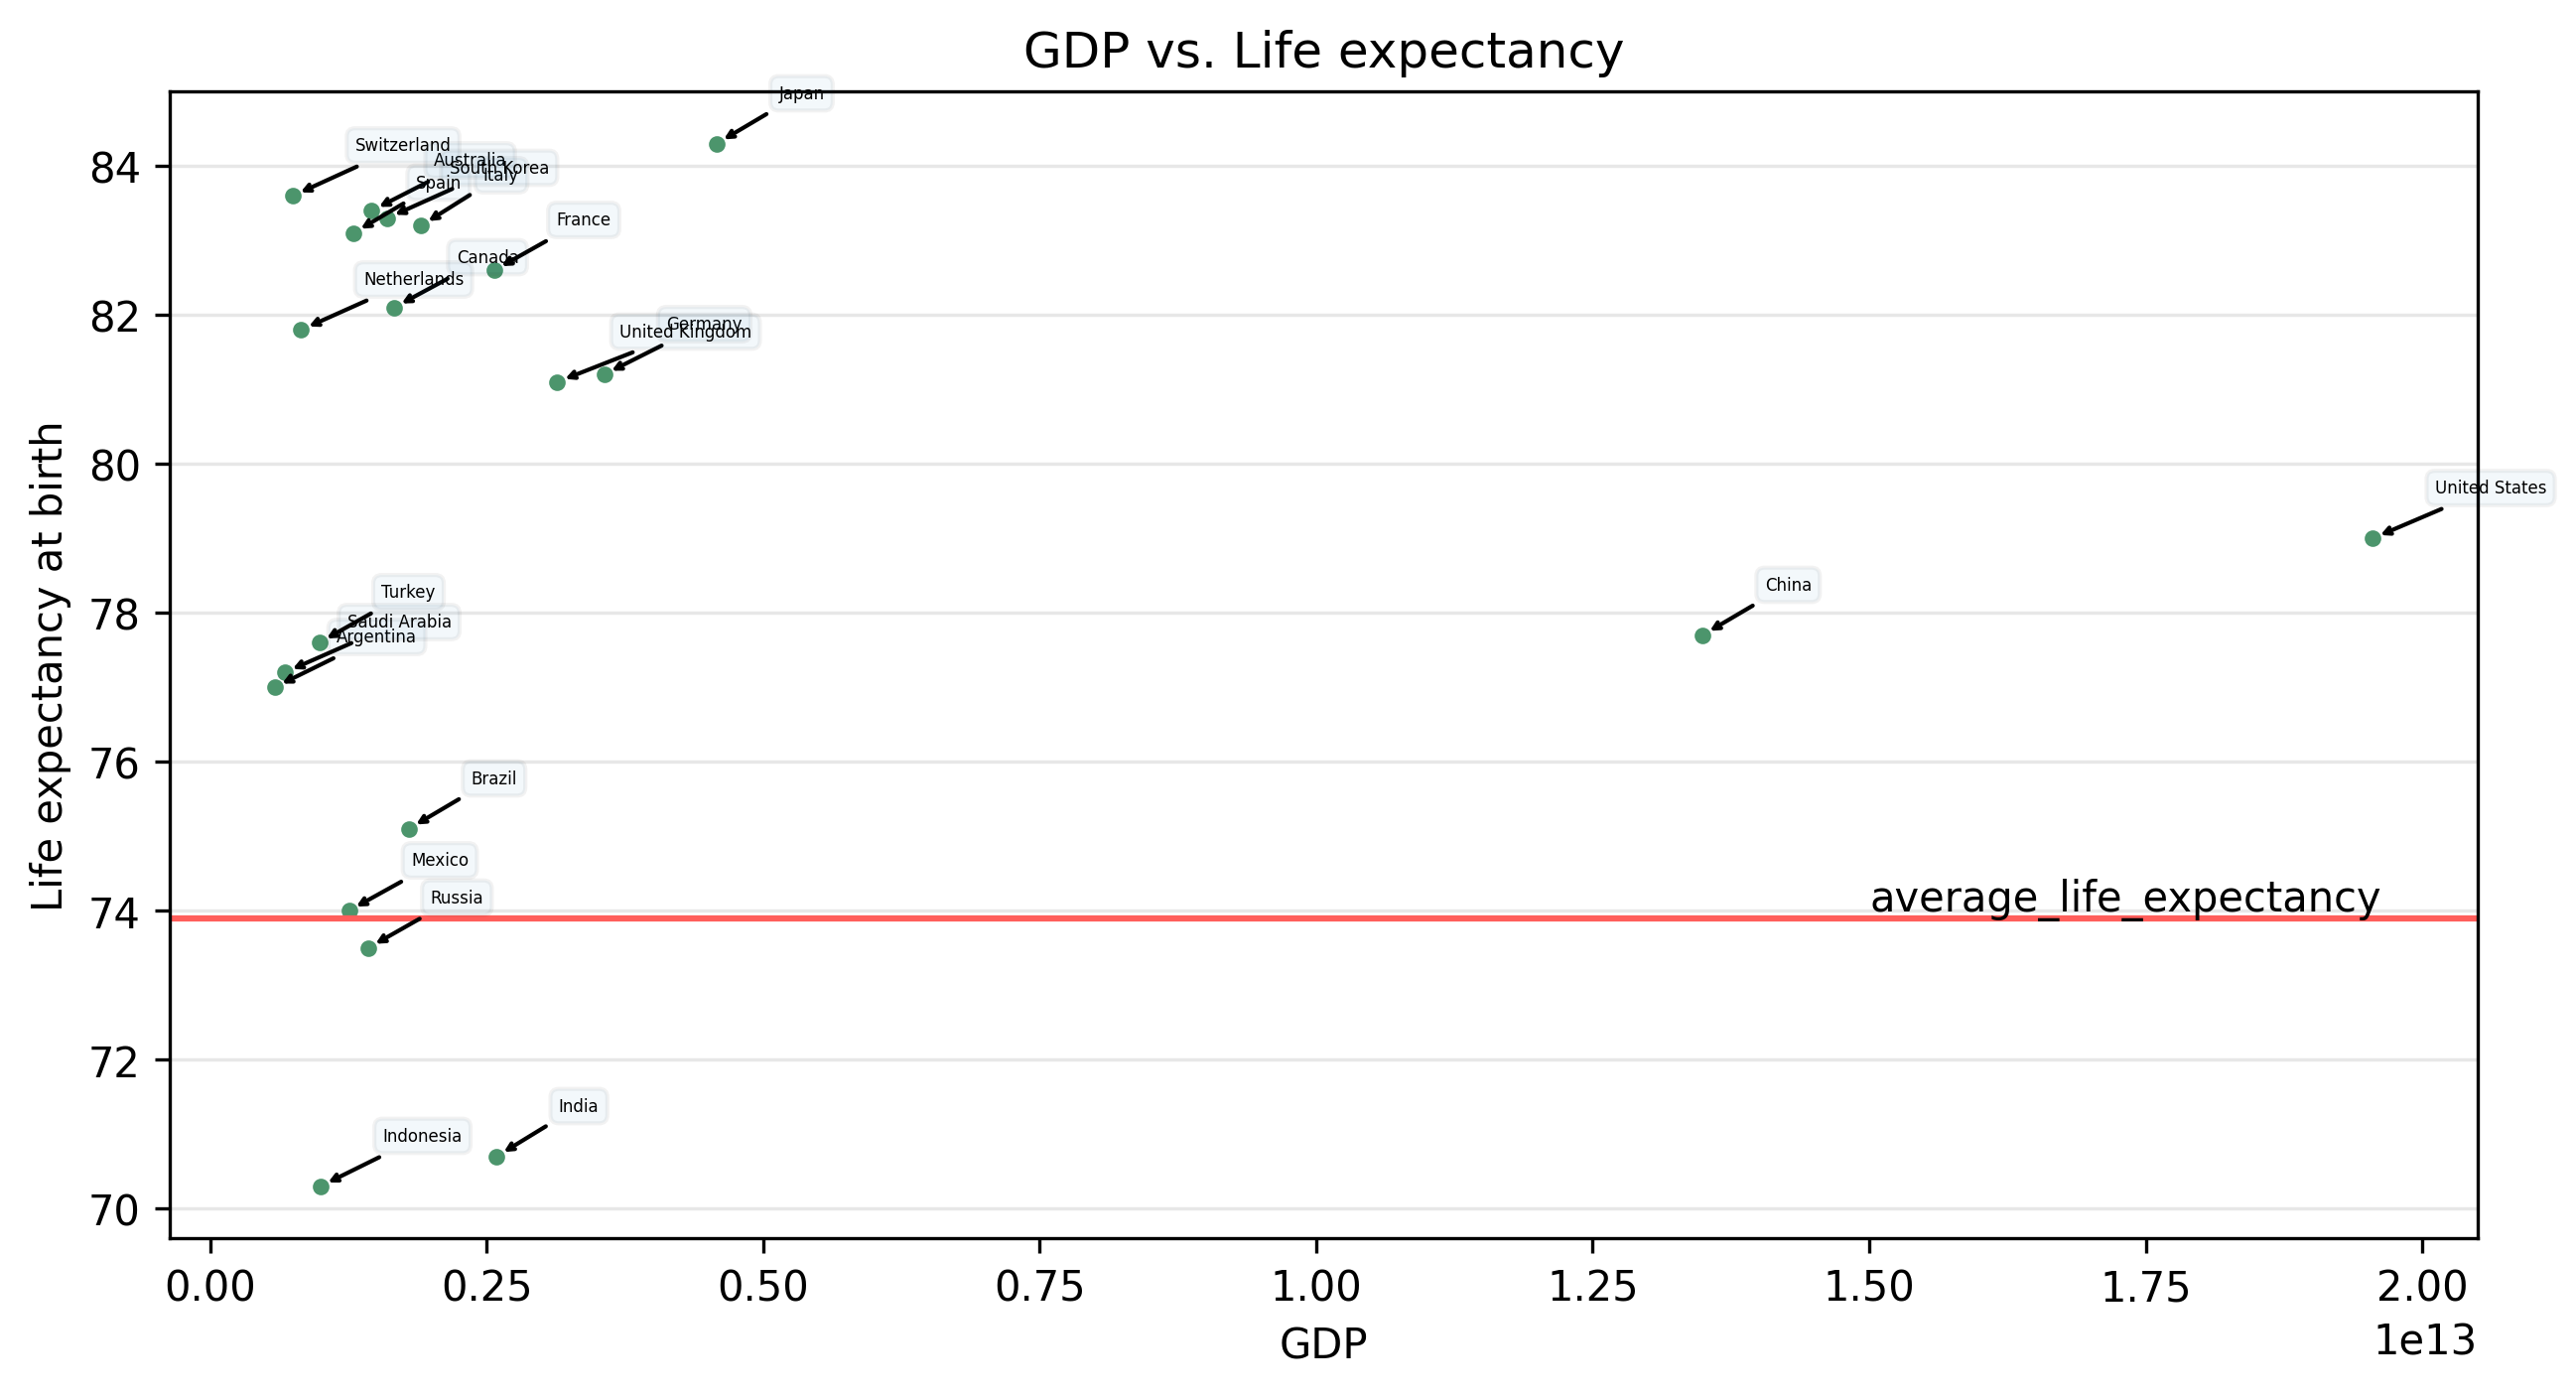

In [906]:
high_gdp = df2[df2['GDP (constant 2015 US$)'] > threshold_gdp]


fig = plt.figure(figsize=[10,5])
plt.plot(high_gdp['GDP (constant 2015 US$)'], high_gdp['Life expectancy at birth (historical)'], '.', color='#4C956C');
# single line
plt.axhline(average_life_expectancy, color = '#FF5E5B', label = 'average_gdp')
plt.text(1.5e13, 74, 'average_life_expectancy',fontsize=10)

plt.xlabel('GDP')
plt.ylabel('Life expectancy at birth')
plt.title('GDP vs. Life expectancy')
plt.grid(axis = 'y', zorder=0, alpha=0.3)

for label, x, y in zip(high_gdp['Entity'], high_gdp['GDP (constant 2015 US$)'], high_gdp['Life expectancy at birth (historical)']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(15, 10),
        textcoords='offset points', ha='left', va='bottom',
        fontsize=4,
        bbox=dict(boxstyle='round,pad=0.5', alpha=0.05),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
        )

plt.show()

#### **Question (e)**
Related to question d, what would happen if you use GDP per capita as an indicator of a strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of d and e.

In [907]:
threshold_GDP_per_capita = df_2018['GDP per capita'].quantile(0.9) # 90th percentile
average_life_expectancy2 = df_2018['Life expectancy at birth (historical)'].quantile(0.5)
print(threshold_GDP_per_capita)
print(average_life_expectancy2)

44786.7904
74.0


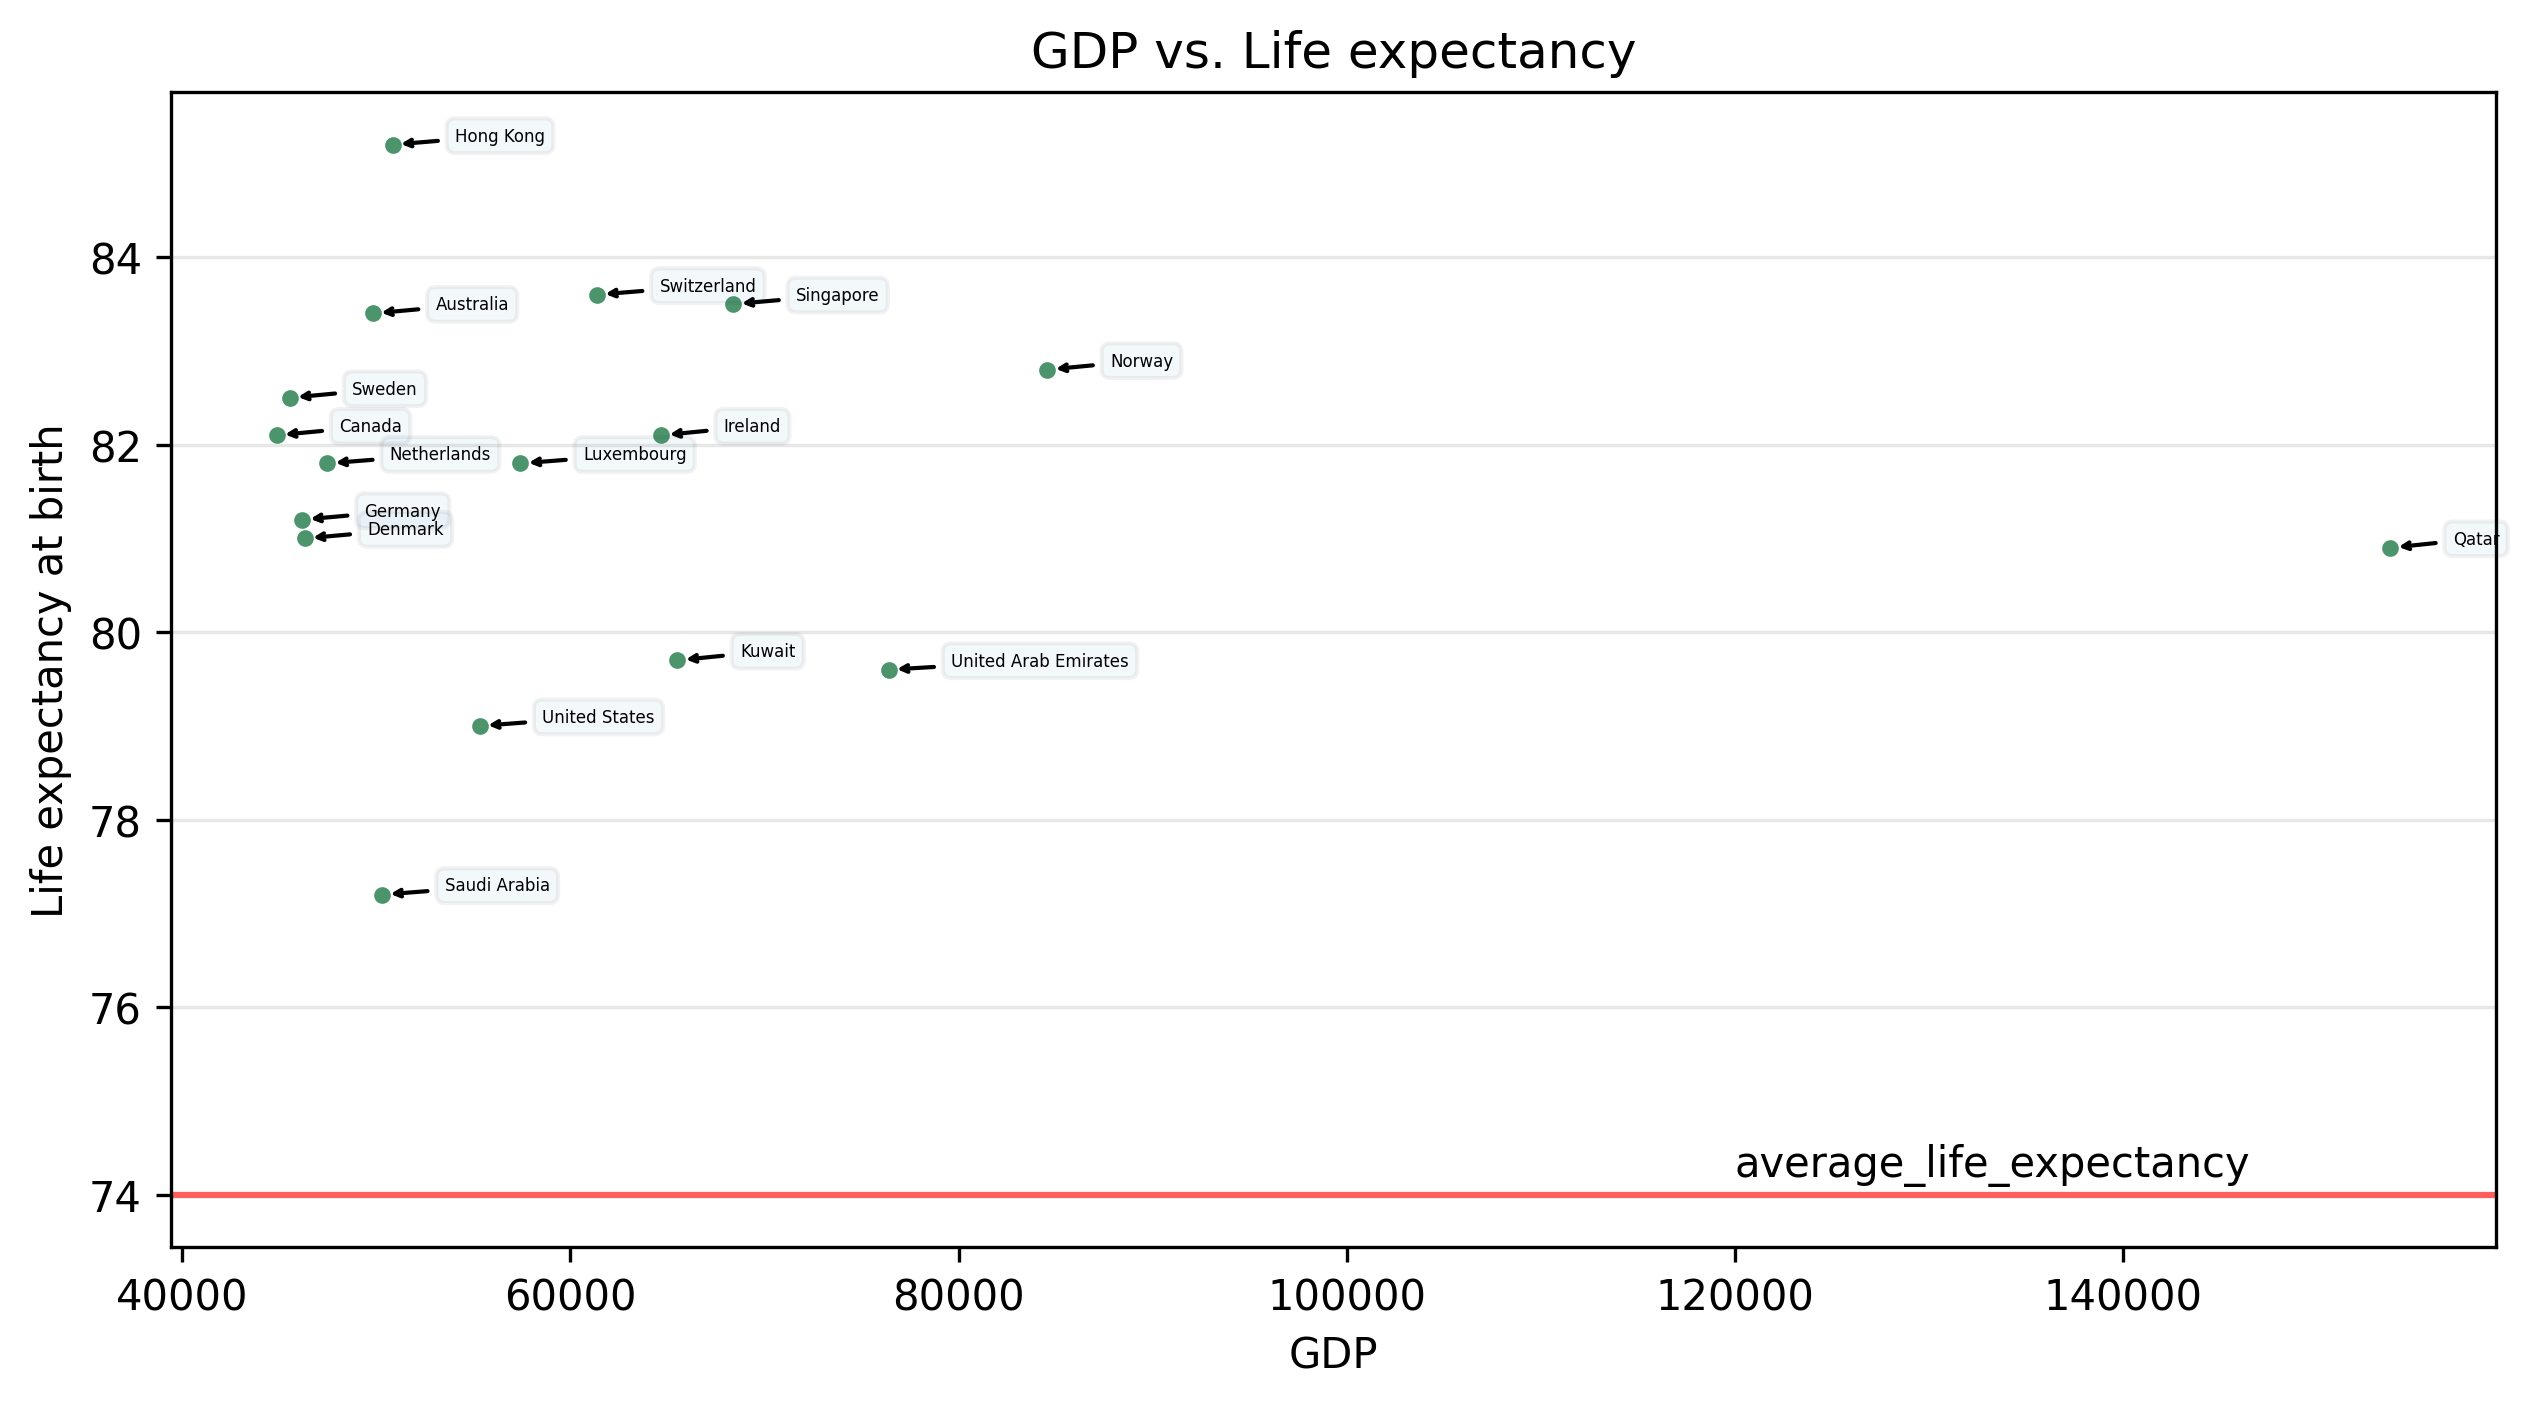

In [908]:
high_GDP_per_capita = df_2018[df_2018['GDP per capita'] > threshold_GDP_per_capita]


fig = plt.figure(figsize=[10,5])
plt.plot(high_GDP_per_capita['GDP per capita'], high_GDP_per_capita['Life expectancy at birth (historical)'], '.', color='#4C956C');
# single line
plt.axhline(average_life_expectancy2, color = '#FF5E5B', label = 'average_gdp')
plt.text(120000, 74.2, 'average_life_expectancy',fontsize=10)

plt.xlabel('GDP')
plt.ylabel('Life expectancy at birth')
plt.title('GDP vs. Life expectancy')
plt.grid(axis = 'y', zorder=0, alpha=0.3)

for label, x, y in zip(high_GDP_per_capita['Entity'], high_GDP_per_capita['GDP per capita'], high_GDP_per_capita['Life expectancy at birth (historical)']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(15, 0),
        textcoords='offset points', ha='left', va='bottom',
        fontsize=4,
        bbox=dict(boxstyle='round,pad=0.5', alpha=0.05),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
        )

plt.show()